### Montagem e Carregamento dos Dados

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

caminho_dados = 'IDASE/25/dados'

fb = pd.read_csv(f"/content/drive/MyDrive/{caminho_dados}/fb_stock_prices_2018.csv", index_col='date', parse_dates=True)

terremotos = pd.read_csv(f"/content/drive/MyDrive/{caminho_dados}/earthquakes.csv")

covid = pd.read_csv(f"/content/drive/MyDrive/{caminho_dados}/covid19_cases.csv")
covid = covid.rename(columns={'dateRep': 'date'})
covid['date'] = covid['date'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y'))
covid = covid.set_index('date').replace('United_States_of_America', 'USA')
covid = covid.sort_index()['2020-01-18':'2020-09-18']

Mounted at /content/drive


### Gráfico de Linhas


Text(0.5, 0, 'Data')

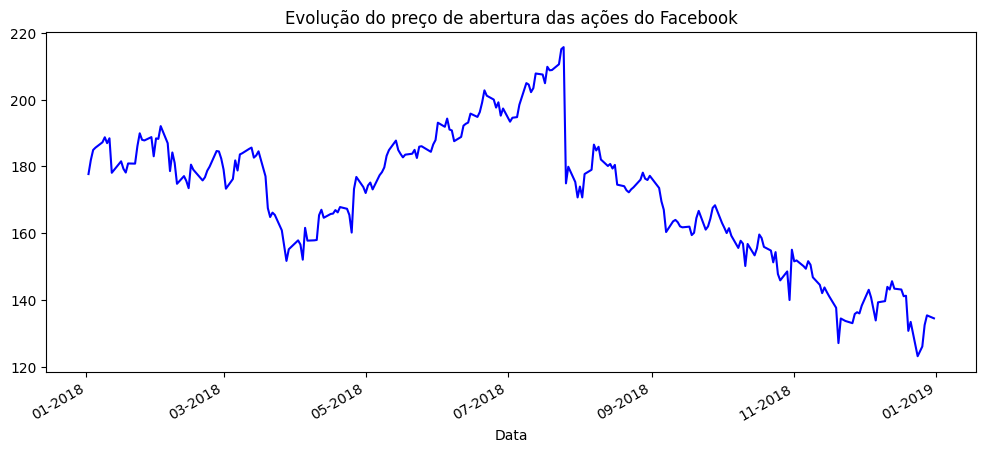

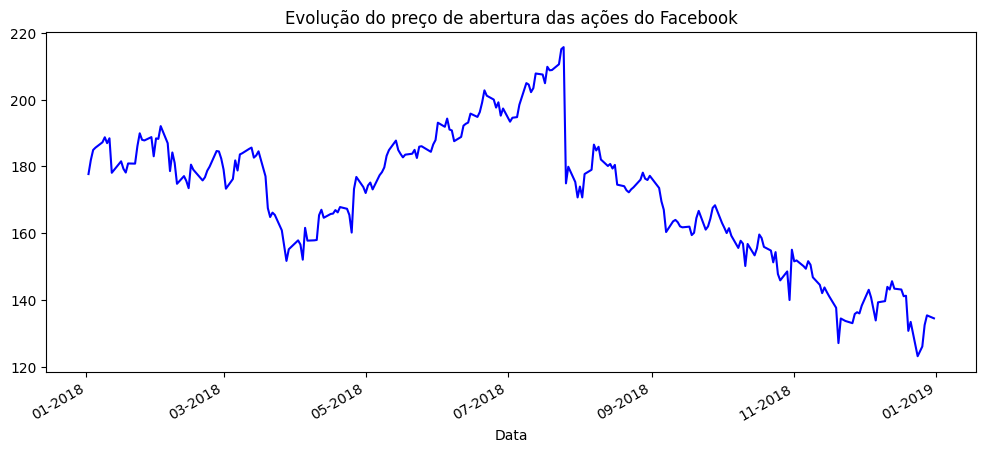

In [ ]:
%matplotlib inline
import matplotlib.dates as mdates

ax = fb.plot(
    kind='line',
    y='open',
    figsize=(12, 5),
    style='-b',
    legend=False,
    title='Evolução do preço de abertura das ações do Facebook'
)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax.set_xlabel('Data')

ax = fb.plot(
    kind='line',
    y='open',
    figsize=(12, 5),
    color='blue',
    linestyle='solid',
    legend=False,
    title='Evolução do preço de abertura das ações do Facebook'
)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax.set_xlabel('Data')

#### Traçando vários gráficos na mesma figura

Text(0.5, 0, 'Data')

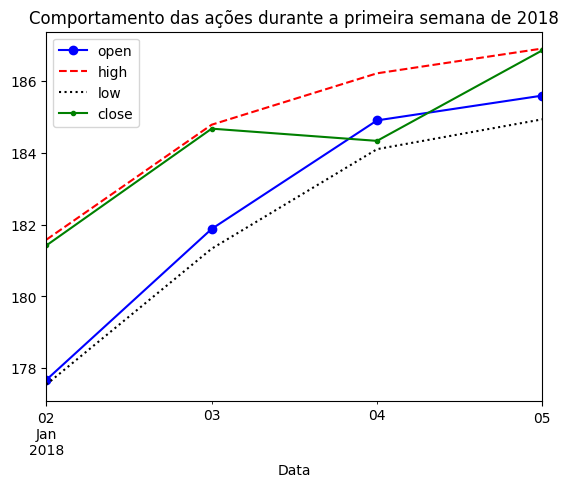

In [ ]:
%matplotlib inline
from pandas.tseries.offsets import DateOffset
ax = fb.first('1W').plot(
    y=['open', 'high', 'low', 'close'],
    style=['o-b', '--r', ':k', '.-g'],
    title='Comportamento das ações durante a primeira semana de 2018'
)

ax.set_xlabel('Data')


#### Criando Subplots

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

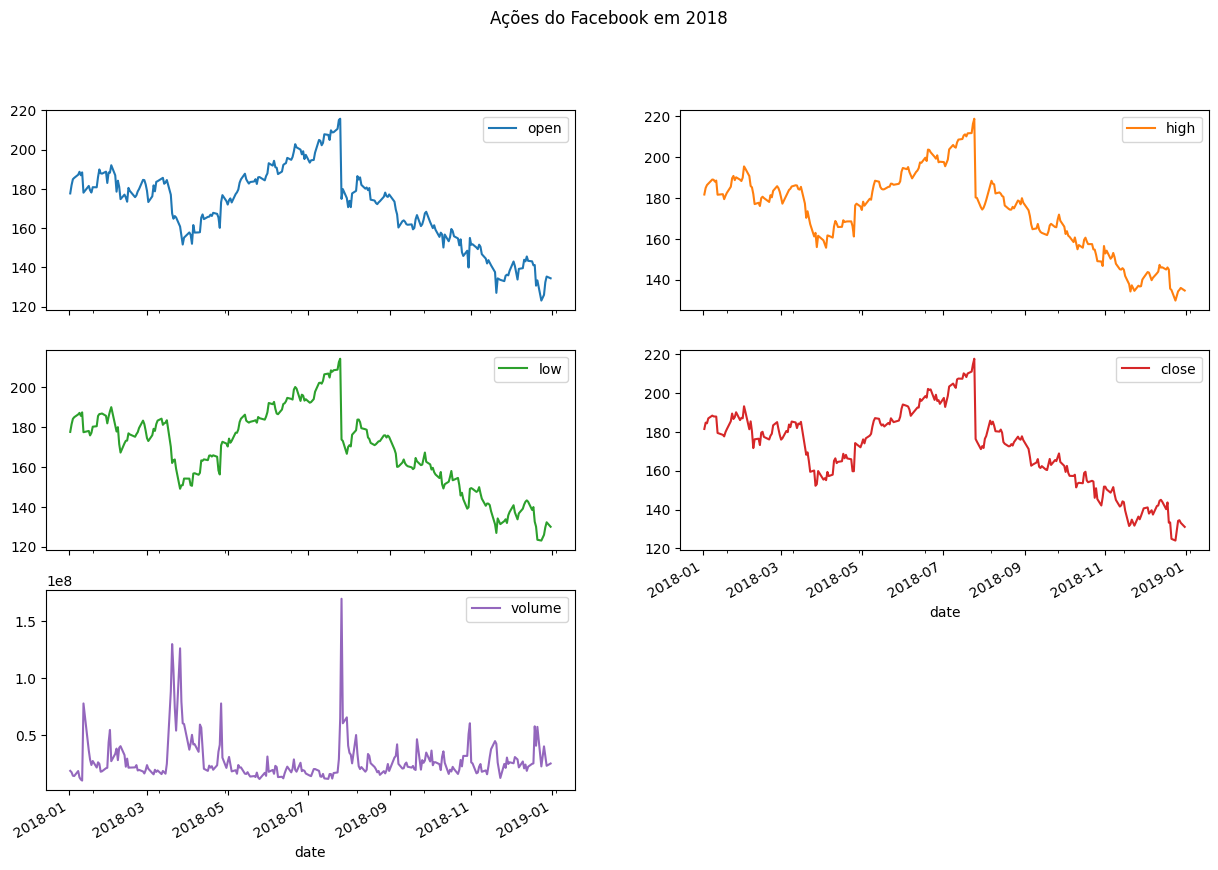

In [ ]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3, 2),
    figsize=(15, 10),
    title='Ações do Facebook em 2018'
)

### Organização dos dados em um DataFrame

- Um DataFrame pode ser organizado em dois formatos diferentes: amplo e longo.

- Formato Amplo: cada coluna do DataFrame representa uma variável e cada linha representa uma observação.

| Nome  | Sexo | Idade | Altura (cm) | Peso (kg) |
|-------|------|-------|-------------|-----------|
| João  | M    | 28    | 175         | 75        |
| Maria | F    | 32    | 162         | 58        |
| Ana   | F    | 25    | 168         | 62        |

- Formato Longo: as informações são armazenadas em uma forma que cada observação é representada em múltiplas linhas. É um formato mais flexível, apesar de consumir mais recursos para armazenamento.

| Nome  | Sexo | Característica | Valor |
|-------|------|---------------|-------|
| João  | M    | Idade         | 28    |
| João  | M    | Altura (cm)   | 175   |
| João  | M    | Peso (kg)     | 75    |
| Maria | F    | Idade         | 32    |
| Maria | F    | Altura (cm)   | 162   |
| Maria | F    | Peso (kg)     | 58    |
| Ana   | F    | Idade         | 25    |
| Ana   | F    | Altura (cm)   | 168   |
| Ana   | F    | Peso (kg)     | 62    |

- Pode-se utilizar a função pivot() do pandas para se converter do formato longo para o amplo. Ela possui basicamente 3 argumentos:

* **index**: indica a(s) coluna(s) que serão usadas como identificadores na tabela 
resultante.
* **columns**: indica a coluna que será transformada em novas colunas na tabela resultante.
* **values**: indica a coluna que será usada para preencher os valores nas novas colunas.

### Organizando os dados de COVID-19 para criar subplots de países específicos

- Neste exercício deseja-se traçar a média móvel de novos casos de alguns países.

- O arquivo .csv lido armazena os dados no formato longo. No entanto, para plotar os dados, os novos casos de cada país deverão estar em uma coluna separada, e não misturados na mesma coluna ("cases"). Para realizar essa conversão de formato, será utilizada a função **pivot()**.

- A média móvel por sua vez pode ser calculada utilizando a função **rolling()**, que permite o cálculo de estatísticas em janelas temporais.

<Axes: xlabel='date'>

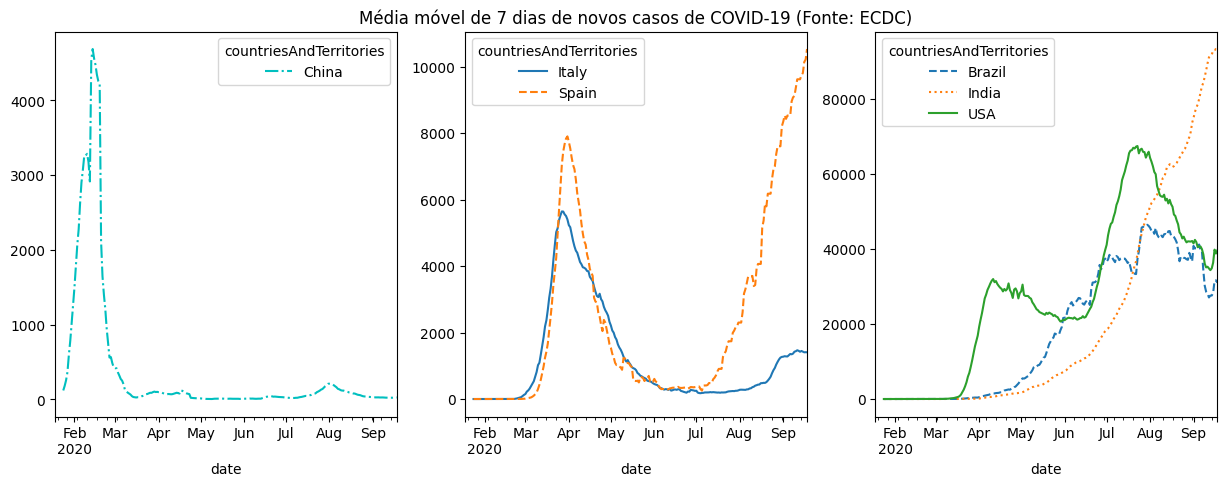

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
novos_casos_med_mov = covid.pivot_table(
    index=covid.index, 
    columns='cuntriesAndTerritories', 
    values='cases'
).rolling(7).mean()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
novos_casos_med_mov[['China']].plot(ax=axes[0], style='-.c')
novos_casos_med_mov[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'],
    title='Média móvel de 7 dias de novos casos de COVID-19 (Fonte: ECDC)')
novos_casos_med_mov[['Brazil', 'India', 'USA']].plot(ax=axes[2], style=['--', ':', '-'])

### Avaliando a relação entre variáveis

Neste exemplo será avaliada a relação entre o volume negociado das ações do Facebook com a diferença entre os valores máximos e mínimos diários. Para isso vamos adicionar uma coluna com este dado no DataFrame utilizando a função **assign()**:

```python
fb.assign(variacao_maxima=fb.high - fb.low)
```

#### 1ª Opção: Scatter plot com parâmetros convencionais

<Axes: title={'center': 'Relação entre o volume negociado e a variação máxima diária da ação do Facebook.'}, xlabel='volume', ylabel='variacao_maxima'>

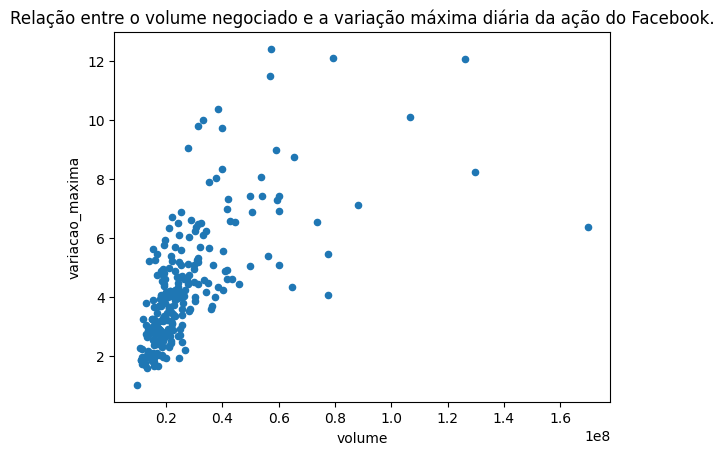

In [ ]:
%matplotlib inline
fb.assign(variacao_maxima=fb.high - fb.low).plot(
    kind='scatter', x='volume', y='variacao_maxima',
    title='Relação entre o volume negociado e a variação máxima diária da ação do Facebook.')

#### 2ª Opção: Scatter plot adicionando uma escala logarítmica e transparência nos pontos

<Axes: title={'center': 'Relação entre o volume negociado e a variação máxima diária da ação do Facebook.'}, xlabel='volume', ylabel='variacao_maxima'>

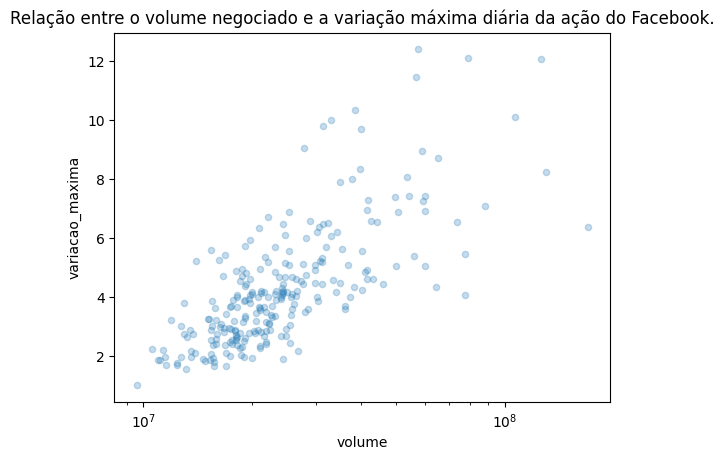

In [ ]:
%matplotlib inline
fb.assign(variacao_maxima=fb.high - fb.low).plot(
    kind='scatter', x='log_volume', y='variacao_maxima',
    title='Relação entre o volume negociado e a variação máxima diária da ação do Facebook.',
    logx=True, 
    alpha=0.25)

3ª Opção: Melhorando ainda mais a visualização com hexbins

O plot do tipo hexbin é forma um histograma bidimensional, que é obtido dividindo-se o gráfico em uma grade de hexágonos e sombreando-os com base na concentração de pontos em cada bin.

<Axes: title={'center': 'Relação entre o volume negociado e a variação máxima diária da ação do Facebook.'}, xlabel='volume', ylabel='variacao_maxima'>

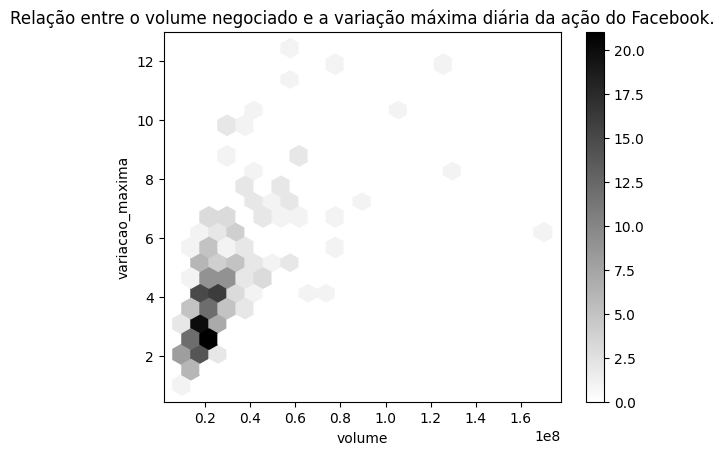

In [ ]:
%matplotlib inline

fb.assign(variacao_maxima=fb.high - fb.low).plot(
    kind='hexbin', x='volume', y='variacao_maxima',
    title='Relação entre o volume negociado e a variação máxima diária da ação do Facebook.',
    colormap='gray_r', 
    gridsize=20) 

### Matriz de correlação

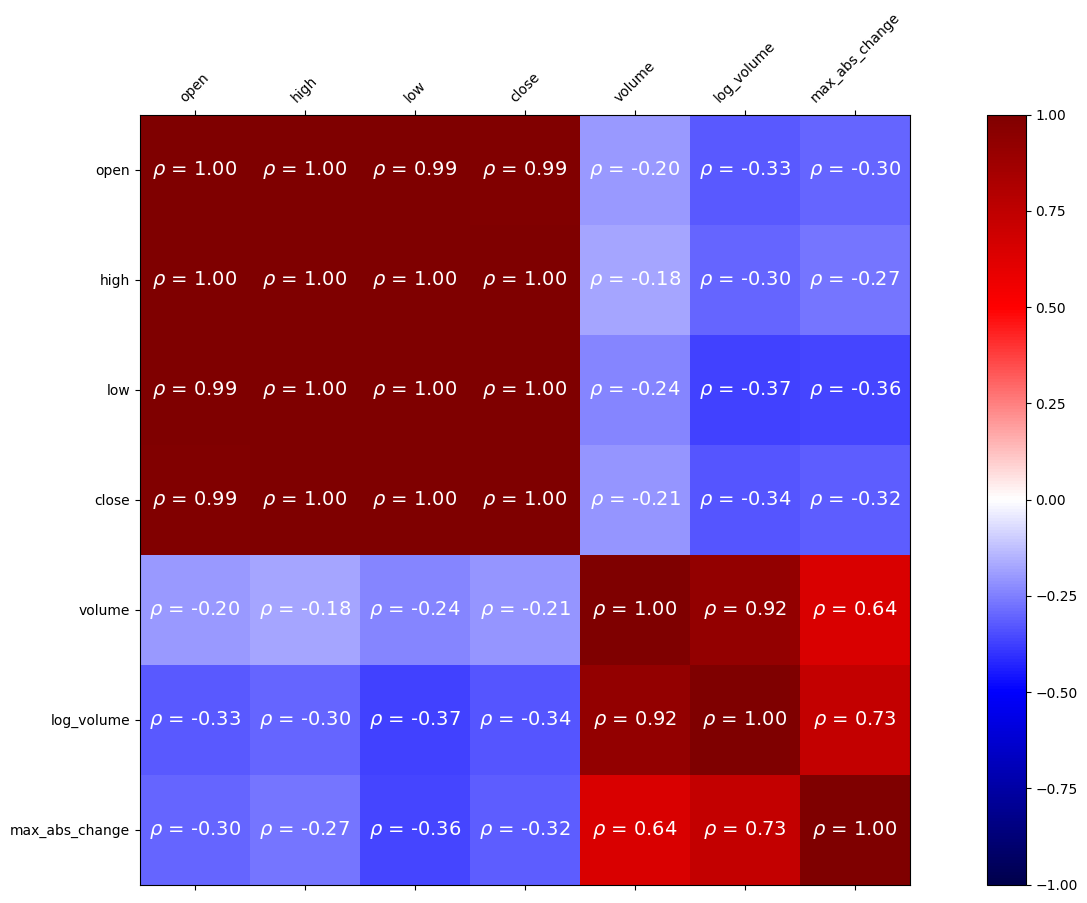

In [ ]:
import numpy as np

fig, ax = plt.subplots(figsize=(20, 10))

# Cálculo da matriz de correlação
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

# Criação do mapa de calor e barra de cores
im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

# Inclusão dos rótulos na matriz

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1]) # Correção de um bug da biblioteca
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1]) # Correção de um bug da biblioteca
ax.set_yticklabels(labels)

# Inclusão do valor do coeficiente de correlação dentro das caixas

for (i, j), coef in np.ndenumerate(fb_corr):
  ax.text(
      i, j, fr'$\rho$ = {coef:.2f}',
      ha='center', va='center',
      color='white', fontsize=14
  )

### Análises de dados utilizando distribuições

Existem várias ferramentas para a análise da distribuição dos dados e estas deverão ser utilizadas de acordo com o objetivo. Dentre as principais, destacam-se:


*   **Histogramas**: gráficos que mostram a distribuição de uma variável em um conjunto de dados. Eles dividem o conjunto de dados em intervalos e mostram a frequência ou a proporção de observações que caem em cada intervalo. É útil para visualizar rapidamente a forma e a simetria da distribuição, bem como identificar valores discrepantes ou pontos anômalos.
*   **Estimativas de Densidade por Kernel (KDE)**:  permite estimar a densidade de probabilidade subjacente de uma variável em um conjunto de dados. É uma técnica não paramétrica que suaviza a distribuição de probabilidade de uma variável e produz uma curva de densidade estimada. É útil para visualizar a forma e o contorno da distribuição, bem como identificar modos e anomalias na distribuição.
* **Função densidade de probabilidade acumulada empírica (ECDF)** : mostra a probabilidade acumulada de uma variável aleatória ser menor ou igual a um determinado valor. É obtida a partir de um conjunto de observações.
* **BoxPlot**: permite visualizar a distribuição de uma variável em um conjunto de dados. Ele representa a mediana, os quartis e os valores mínimo e máximo em uma única figura, além de mostrar quais valores são considerados discrepantes. É útil para identificar valores extremos e para comparar a distribuição de uma variável em diferentes grupos ou categorias.


#### Avaliando o histograma de magnitudes de terremotos de acordo com o tipo 



| Magtype | Nome completo                   | Faixa de magnitude | Região de uso    |
| ------- | ------------------------------ | ----------------- | ---------------- |
| ml      | Magnitude local                | 1.5 - 6.5         | Global           |
| mw      | Magnitude de momento           | > 5.0              | Global           |
| ms      | Magnitude de superfície         | > 5.0              | Local            |
| mb      | Magnitude de corpo              | 3.5 - 7.0         | Global           |
| mlr     | Magnitude local revisada       | 2.0 - 6.0         | Itália           |
| md      | Magnitude de duração            | 2.5 - 5.5         | Japão            |
| me      | Magnitude de energia            | > 3.5              | Global           |
| mwp     | Magnitude de onda P prolongada | > 6.0              | Oceano Pacífico |
| mj      | Magnitude de Johnston          | -                 | Local            |


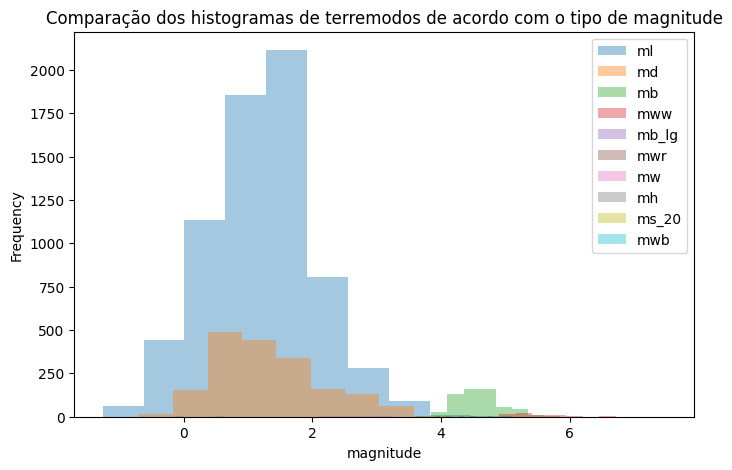

In [ ]:
fig, axes = plt.subplots(figsize=(8, 5))
for magtype in terremotos.magType.unique():
  dados = terremotos.query(f'magType == "{magtype}"').mag
  if not dados.empty:
    dados.plot(
        kind='hist',
        ax=axes,
        alpha=0.4,
        label=magtype,
        legend=True,
        title='Comparação dos histogramas de terremodos de acordo com o tipo de magnitude'
    )
plt.xlabel('magnitude')

# mostrando o gráfico
plt.show()

#### Utilizando Histogramas e KDEs

Text(0.5, 0, 'Preço (US$)')

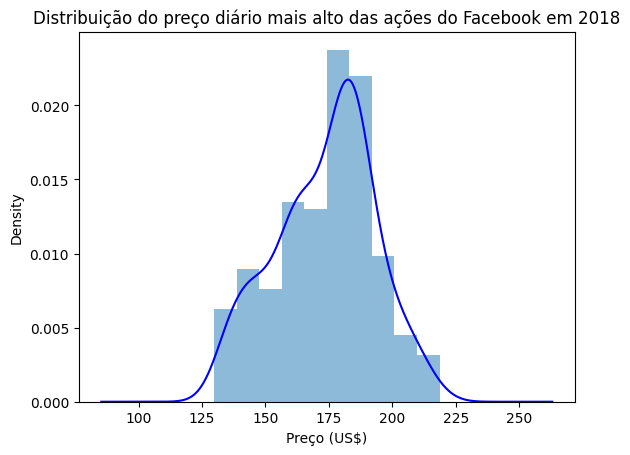

In [ ]:
ax = fb['high'].plot(kind='hist', density=True, alpha=0.5) #O parâmetro density informa que deseja-se um histograma normalizado (somatório igual a 1)
fb.high.plot(ax=ax, kind='kde', color='blue',
             title="Distribuição do preço diário mais alto das ações do Facebook em 2018")
plt.xlabel('Preço (US$)')

#### Função densidade de probabilidade acumulada empírica (ECDF)

Neste exemplo será mostrada a ECDF de terremotos usando o tipo de medição ml e será incluída uma marcação com a probabilidade da magnitude ser menor que 3.

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

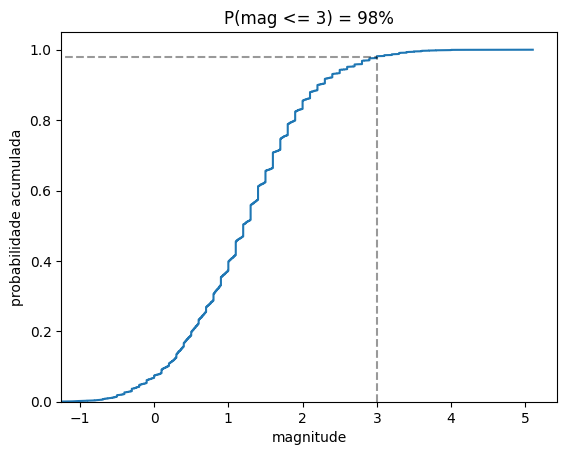

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(terremotos.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

plt.xlabel('magnitude') 
plt.ylabel('probabilidade acumulada') 

plt.plot(
    [3, 3], [0, .98], '--k', 
    [-1.5, 3], [0.98, 0.98], '--k', alpha=0.4
)
plt.ylim(0, None)
plt.xlim(-1.25, None)
plt.title('P(mag <= 3) = 98%')

#### Boxplot

Neste exemplo será utilizado um boxplot para avaliar a distribuição de terremotos de acordo com o magType. Utilizaremos o groupby() para gerar boxplots de acordo com o magType.

Text(0, 0.5, 'magnitude')

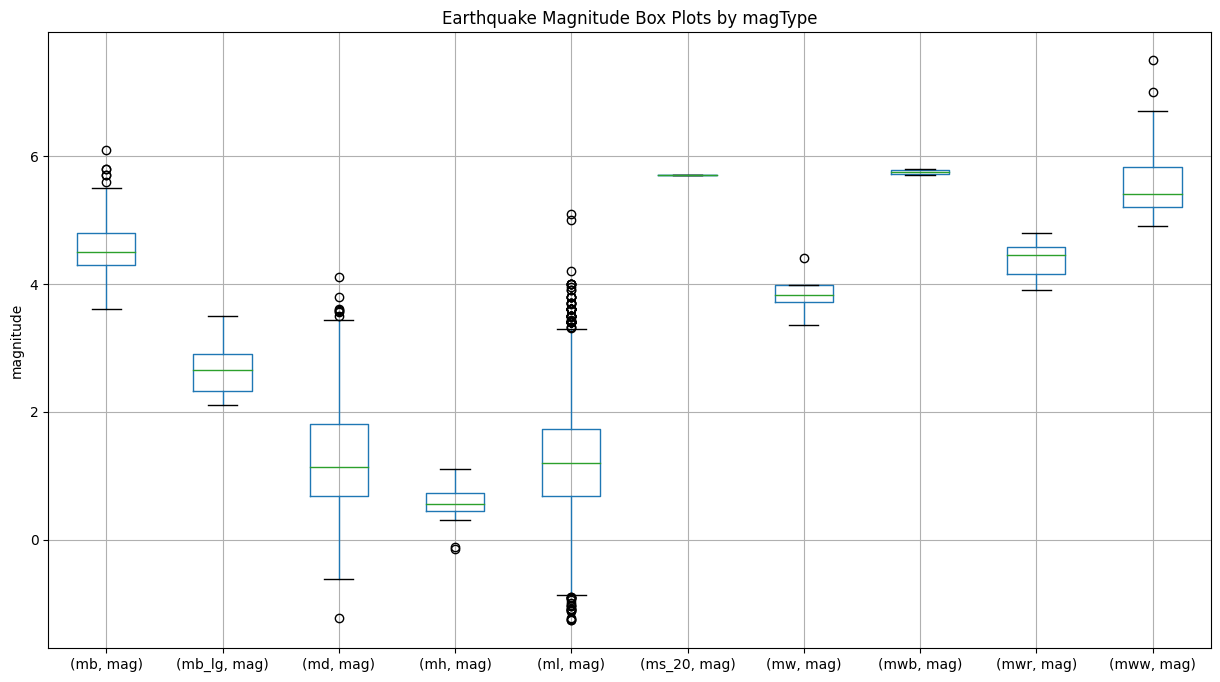

In [ ]:
terremotos[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('BoxPlot dos Terremos de acordo com o magType')
plt.ylabel('magnitude') 

### Representação de Dados Categóricos

A utilização de gráficos de barras é adequada para a visualização de dados categóricos, pois permite que estes sejam comparados de maneira facilitadas.

- **Gráficos de barras horizontais**: facilitam a comparação do tamanho de cada categoria. Além disso, possuem maior espaço para a exibição de nomes de categoria longos (sem a necessidade de girá-los).
- **Gráficos de barras verticais**: apropriados quando há muitas categorias ou quando há alguma ordem entre elas (por exemplo, uma evolução ao longo do tempo).
- **Gráficos de barras empilhados**: ajudam a mostrar a contribuição de cada dado ou categoria para um total. Através dele é possível compor mais de uma informação em um mesmo gráfico.

#### **Exemplo Gráfico de Barras Horizontal**: Locais com maiores incidências de terremotos e com mais tsunamis

- Para se determinar o número de ocorrências de terremotos em cada local, pode-se utilizar a função **value_counts()** da pandas, que retorna a contagem de cada um dos elementos em uma coluna do DataFrame.

- Para avaliar a quantidade de tsunamis, pode-se utilizar o método **group_by()** para a seleção do local e o método **sum()** para realizar a soma do total de tsunamis detectados.



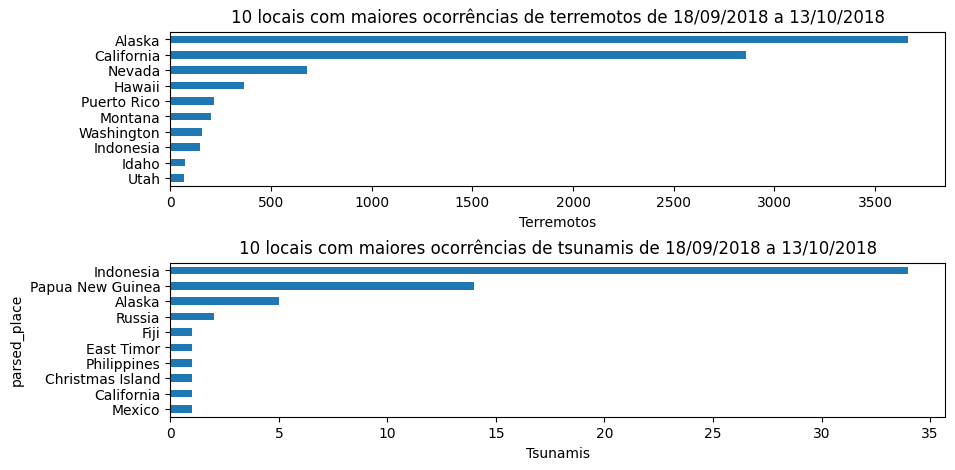

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1)

terremotos['parsed_place'].value_counts().iloc[9::-1,].plot(
    ax = axes[0],
    kind='barh', figsize=(10, 5),
    title='10 locais com maiores ocorrências de terremotos de 18/09/2018 a 13/10/2018'
)
axes[0].set_xlabel('Terremotos') 

terremotos.groupby('parsed_place')['tsunami'].sum().sort_values().iloc[-10:,].plot(
    ax = axes[1],
    kind='barh', figsize=(10, 5), 
    title= '10 locais com maiores ocorrências de tsunamis de 18/09/2018 a 13/10/2018'
)
axes[1].set_xlabel('Tsunamis')
plt.subplots_adjust(hspace=0.5)

#### **Exemplo Gráfico de Barras Vertical**: Ocorrência diária de terremotos e tsunamis na Indonésia.

Considerando que a Indonésia é o local com mais tsunamis durante o período avaliado, pode ser interessante verificar quantos terremotos e tsunamis a Indonésia recebe diariamente. Podemos exibir essas informações utilizando um gráfico de barras vertical.

<ipython-input-19-46c21d464a2f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  terremotos_indonesia = terremotos.query('parsed_place == "Indonesia"').assign(


Text(0, 0.5, 'Número de eventos')

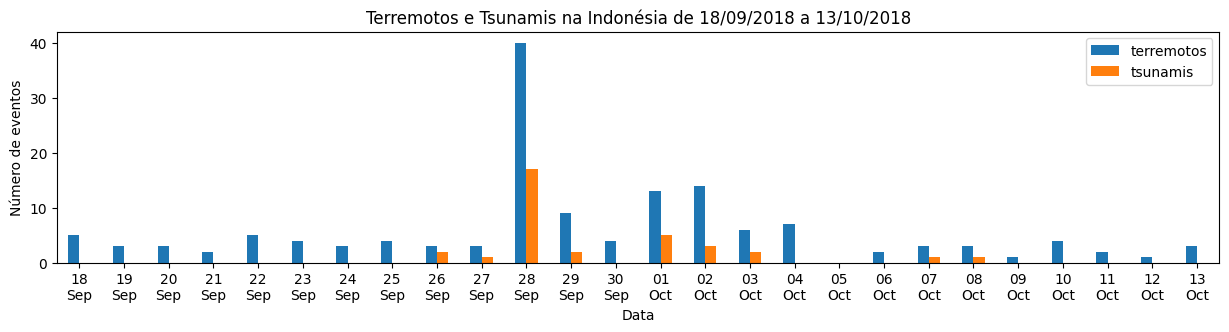

In [19]:
terremotos_indonesia = terremotos.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

terremotos_indonesia.index = terremotos_indonesia.index.strftime('%d\n%b')

terremotos_indonesia.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['terremotos', 'tsunamis'], 
    title='Terremotos e Tsunamis na Indonésia de 18/09/2018 a 13/10/2018'
)

plt.xlabel('Data')
plt.ylabel('Número de eventos')

#### **Exemplo Gráfico de Barras Empilhado**: Avaliação de magnitudes de terremotos de com diversos tipos de magnitude.

Neste exemplo será mostrado como criar um gráfico de barras empilhado que mostre a distribuição de magnitudes de terremotos, destacando a contribuição de cada tipo de magnitude.



<Axes: title={'center': 'Terremotos de acordo com bins e tipo de magnitude'}, xlabel='mag_bin', ylabel='terremotos'>

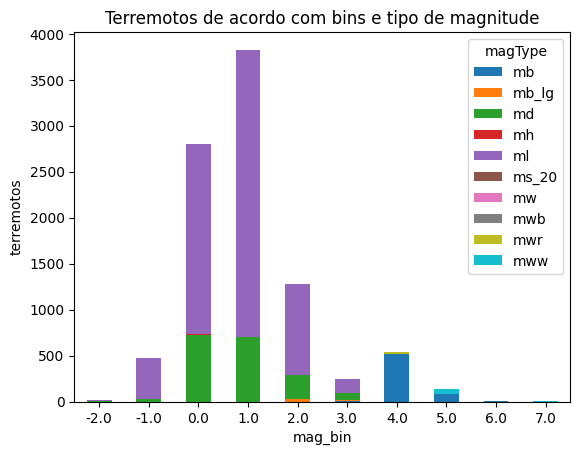

In [22]:
import numpy as np

pivot = terremotos.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
    stacked=True, rot=0, ylabel='terremotos', 
    title='Terremotos de acordo com bins e tipo de magnitude'
)

### Gráficos especiais

A biblioteca pandas oferece um conjunto de gráficos especiais, que permitem visualizações úteis com menor trabalho de codificação. Dentre os quais destacam-se:


*   **Matriz de Dispersão**: gráfico utilizado para visualizar a relação entre várias variáveis de um dataset. Ele é composto por um conjunto de gráficos de dispersão (scatter plots), em que cada par de variáveis é plotado em um gráfico de coordenadas cartesianas.

*   **Lag plot**:gráfico utilizado para verificar se uma série temporal é aleatória ou apresenta algum padrão. Ele é criado plotando cada ponto da série temporal em relação ao ponto que o precede com um determinado atraso, chamado de "lag".



#### Exemplo: Matriz de dispersão dos dados das ações do Facebook

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

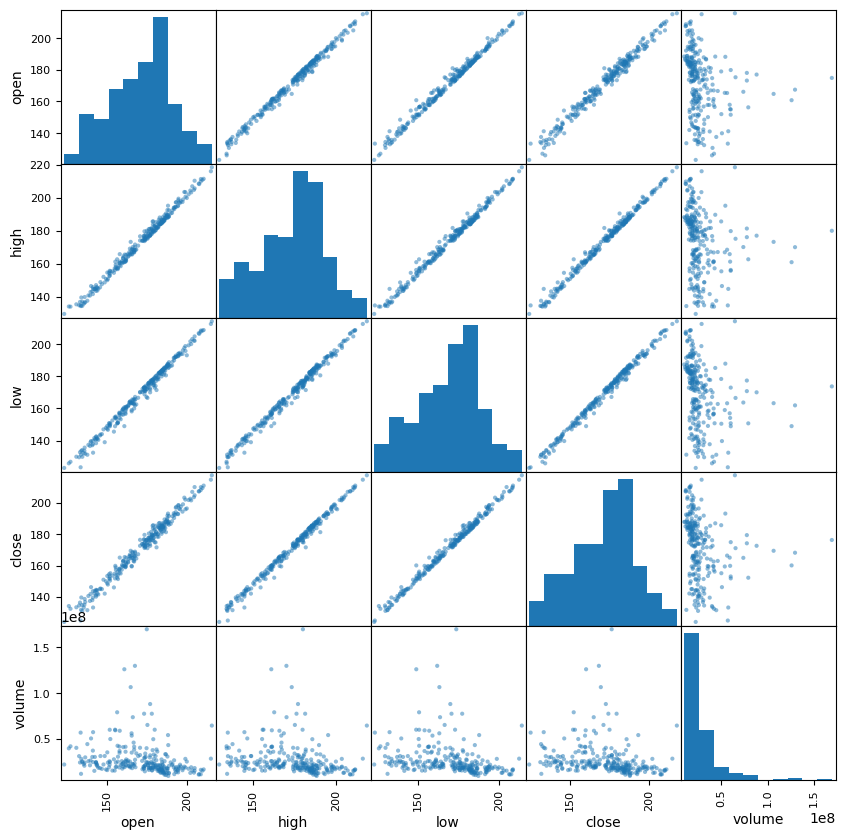

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

#### Lag plot: 

Text(0.5, 0.98, 'Lag plot do preço de fechamento das ações do Facebook com um intervalo de 5 dias')

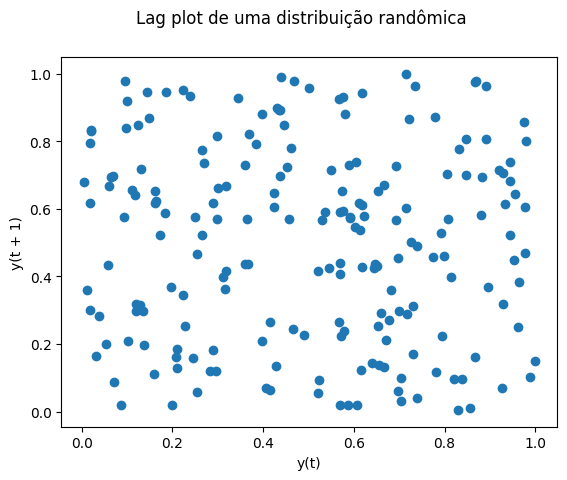

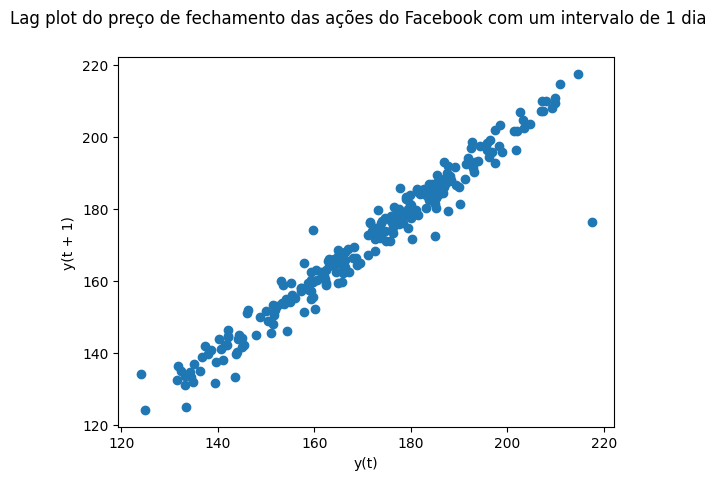

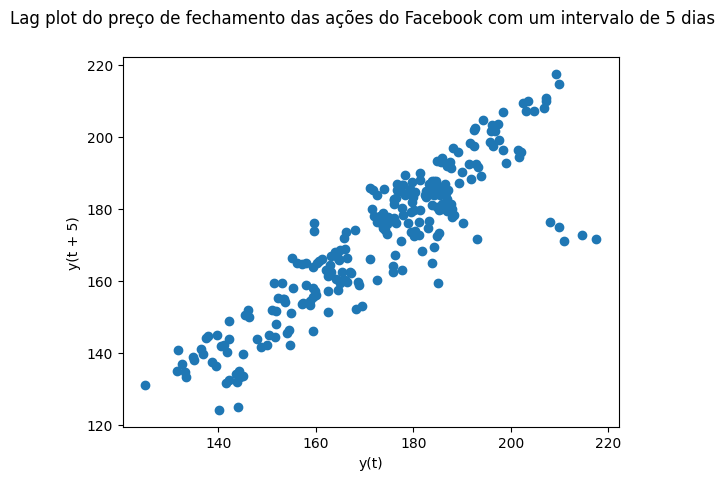

In [44]:
%matplotlib inline
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
np.random.seed(0) # Garantindo reprodutibilidade

fig1 = plt.figure()
lag_plot(pd.Series(np.random.random(size=200)))
fig1.suptitle("Lag plot de uma distribuição randômica")

fig2 = plt.figure()
lag_plot(fb['close'])
fig2.suptitle("Lag plot do preço de fechamento das ações do Facebook com um intervalo de 1 dia")

fig3 = plt.figure()
lag_plot(fb['close'],lag=5)
fig3.suptitle("Lag plot do preço de fechamento das ações do Facebook com um intervalo de 5 dias")
